**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de la [competencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker).
Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import numpy

import seaborn as sns

sns.set_context('talk')

In [2]:
import plotly

# Make sure it's 4.14.3
plotly.__version__

'4.14.3'

In [3]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [4]:
melb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

melb_df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


#### Breve estudio del dataset

In [5]:
melb_df.shape

(13580, 21)

In [6]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Investigar la distribución de las variables del conjunto de datos, y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
    1. Justificar cada columna no seleccionada.
    2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

3. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
    1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
    2. Utilizar la variable `zipcode` para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
    3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las *n* ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de *AirBnB* además de las que están en `interesting_cols`, si les parecen relevantes.

### Ejercicio 1.1

In [8]:
# Métricas de la distribución de la variable Price
print(f'Media: {melb_df.Price.mean()}')
print(f'Máximo: {melb_df.Price.max()}')
print(f'Mínimo: {melb_df.Price.min()}')

Media: 1075684.079455081
Máximo: 9000000.0
Mínimo: 85000.0


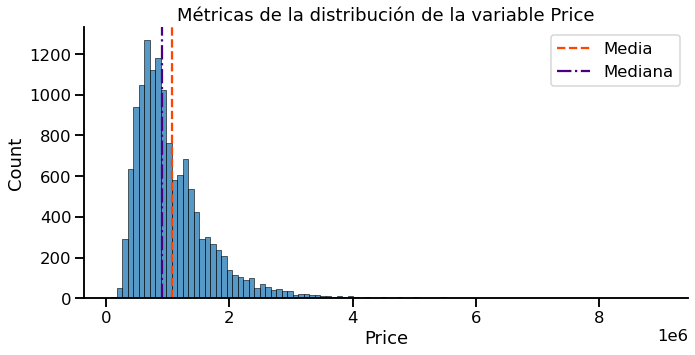

In [9]:
sns.displot(melb_df.Price, bins=100, aspect=2)

plt.title("Métricas de la distribución de la variable Price")
plt.axvline(melb_df.Price.mean(), color='orangered', linestyle='--', label='Media')
plt.axvline(melb_df.Price.median(), color='indigo', linestyle='-.', label='Mediana')

plt.legend();

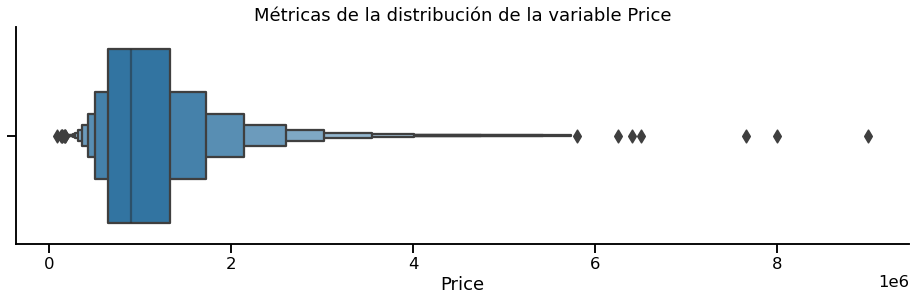

In [10]:
plt.figure(figsize=(16, 4))
plt.title("Métricas de la distribución de la variable Price")

sns.boxenplot(x=melb_df.Price)
sns.despine()

**Respuesta**

En esta instancia, donde aún no hemos evaluado la capacidad de predicción de precios de nuestro modelo, consideramos que todos los datos de nuestro conjunto pueden llegar a ser relevantes.
Por lo tanto, no eliminaremos ningún valor hasta no tener cierto *feedback* de nuestro predictor.

De todas maneras, para resolver la consigna, podríamos aplicar una limpieza a la columna `Price` para eliminar los *outliers* de ambos extremos.

In [11]:
def clean_outliers(dataset, column_name):
    """
    Returns dataset removing the outlier rows from column @column_name.
    """
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        # Diferencia con la media es menor a 2.5 veces la desviación estándar.
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

In [12]:
# Eliminamos los outliers de ambos extremos de la distribución
data = clean_outliers(melb_df, 'Price')

In [13]:
# Métricas de la distribución de la variable Price
print(f'Media: {data.Price.mean()}')
print(f'Máximo: {data.Price.max()}')
print(f'Mínimo: {data.Price.min()}')

Media: 1010122.9111901878
Máximo: 2670000.0
Mínimo: 85000.0


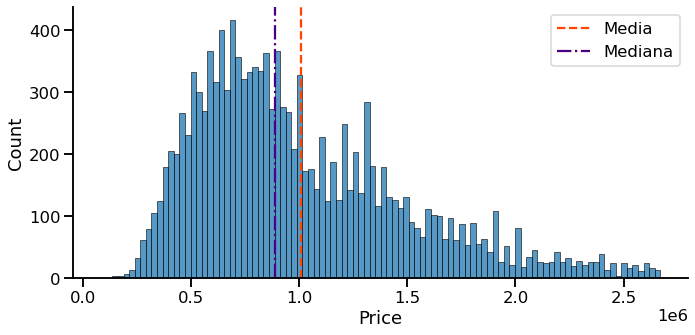

In [14]:
sns.displot(data.Price, bins=100, aspect=2)

plt.axvline(data.Price.mean(), color='orangered', linestyle='--', label='Media')
plt.axvline(data.Price.median(), color='indigo', linestyle='-.', label='Mediana')

plt.legend();

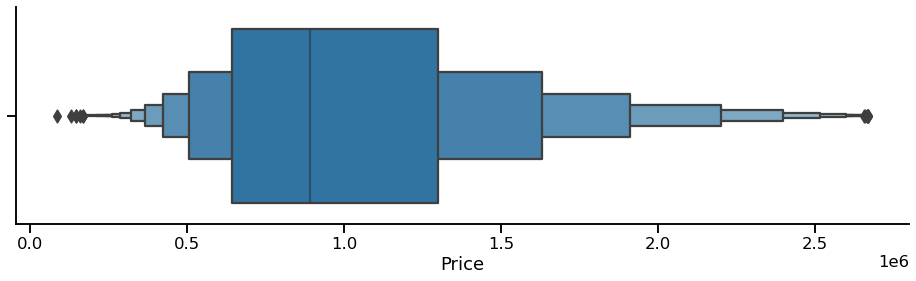

In [15]:
plt.figure(figsize=(16, 4))

sns.boxenplot(x=data.Price)
sns.despine()

### Ejercicio 1.2

In [16]:
# Averiguamos la cantidad de NaNs en nuestro dataset
cols = melb_df.isna().sum()

cols[cols > 0]

Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64

In [17]:
# Averiguamos la cantidad de 0s en nuestro dataset
cols = melb_df[melb_df == 0].count(axis=0)

cols[cols > 0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

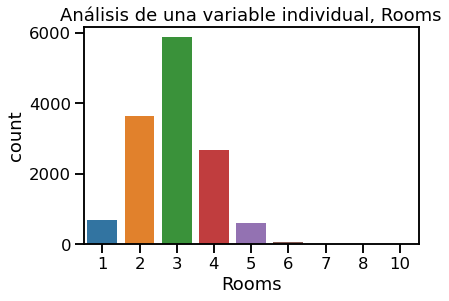

In [18]:
# Análisis de una variable individual, Rooms
plt.title("Análisis de una variable individual, Rooms")
sns.countplot(x=melb_df.Rooms);

### Análisis de Variables

Se realizó un breve análisis para cada una de las variables de nuestro dataset.
Para evitar que la notebook sea demasiado extensa, a continuación detallamos un resumen con las conclusiones obtenidas en el análisis.

**Categóricas**

- `Suburb` Barrio de residencia.
  Hay 314 valores únicos, de los cuales 21 solo poseen una sola propiedad.
  La variable será utilizada para imputar los datos faltantes de departamentos.
- `Type` Tipo de la propiedad.
  En orden de cantidad de ocurrencias, *house*, *unit*, y *townhouse*.
- `Address` Dirección de la propiedad.
  La categoría no aporta demasiada información, ya que la mayoría de los valores son únicos.
  Sería más informativa si solo clasificara la calle de residencia (sin incluir la altura).
  De todas maneras, consideramos que la dirección no es lo suficientemente útil para predecir el precio de una propiedad (en comparación al suburbio, por ejemplo), por lo que **no** será seleccionada.
- `Method` Forma de adquisión de la propiedad.
  En orden de cantidad de ocurrencias, *property sold*, *property sold prior*, *property passed in*, *vendor bid*, y *sold after auction*.
  La última categoría tiene muy pocos valores, pero no se puede agrupar con ningún otra ya que es la única.
- `Regionname` Región general de la propiedad.
  Se pueden separar en dos zonas, y ya que la zona de **Victoria** posee muy pocos datos, serán agrupados en una única categoría.
- `CouncilArea` Departamento (o algo similar a lo que entendemos).
  La variable tiene valores NaNs, que serán resueltos luego de aplicar un *merge*.
  Hay departamentos con una cantidad menor a 10 propiedades, los cuales se podrían agrupar luego de imputar los valores faltantes.
- `Date` Fecha de venta de la propiedad.
  La variable no aporta demasiada información, ya que una fecha exacta no es tan informativa como un perído de tiempo.
  Se requiere de un procesamiento adicional de la variable, para poder separar las fechas en trimestres (en lugar de días).
- `SellerG` Vendedor de la propiedad.
  En total hay 268 vendedores distintos en el conjunto de datos, de los cuales 78 solo han vendido una única propiedad.
  Estos valores son candidatos a ser agrupados en una única categoría.

**Numéricas**

- `Price` Precio de la propiedad.
  La *media* es aproximadamente 1075000.
- `Distance` Distancia al centro.
  Hay valores con cero, pero serán considerados normales ya que es razonable vivir en el centro.
  La *media* es aproximadamente 10.
- `Propertycount` Cantidad de propiedades en el suburbio.
  La *media* es aproximadamente 7450.
- `Postcode` Código postal.
  Hay cerca de 200 valores únicos.
  Se aplicará un *merge* sobre la variable, contra la columna *zipcode* del otro conjunto de datos.
- `Rooms` Cantidad de habitaciones.
  Si fuese una variable categórica, se podrían agrupar todas las propiedades con 5 o más habitaciones.
- `Lattitude`: Latitud de ubicación.
- `Longtitude`: Longitud de ubicación.
- `BuildingArea` Tamaño de la edificación.
  La variable tiene 0s y NaNs entre sus valores, prácticamente el 50% de sus datos son *ruidosos*.
  Consideramos que la imputación de sus valores podría afectar negativamente la capacidad de predicción de nuestro modelo, por lo que **no** será seleccionada.
  La *media* es aproximadamente 150.
- `YearBuilt` Año de construcción.
  La variable tiene NaNs entre sus valores, prácticamente el 40% de sus datos son *ruidosos*.
  Consideramos que la imputación de sus valores podría afectar negativamente la capacidad de predicción de nuestro modelo, por lo que **no** será seleccionada.
  La *media* es aproximadamente 1965.
- `Bedroom2` Cantidad de dormitorios (obtenida a través de *web scraping*).
  La variable tiene 0s, podrían ser imputados ya que son pocos.
  Consideramos que la cantidad de dormitorios no aporta mucha más información que otras variables (como la cantidad de habitaciones, por ejemplo), por lo que **no** será seleccionada.
- `Bathroom` Cantidad de baños.
  La variable tiene 0s, los cuales serán imputados por el valor constante 1.
  Si fuese una variable categórica, se podrían agrupar todas las propiedades con 4 o más baños.
- `Car` Cantidad de cocheras.
  La variable tiene 0s, pero serán considerados normales ya que es razonable tener una propiedad sin conchera.
  La variable tiene NaNs, los cuales serán imputados por el valor constante 0.
  Si fuese una variable categórica, se podrían agrupar todas las propiedades con 5 o más cocheras.
- `Landsize` Tamaño del Terreno.
  La variable tiene 0s, que asumiremos normales ya que no todas las propiedades pueden tener patios.
  La *media* es aproximadamente 550.

In [19]:
# Copiamos nuestro dataset
df = melb_df.copy()

#### Eliminamos la variable `Address`

In [20]:
df.Address.nunique()

13378

In [21]:
df = df.drop(['Address'], axis=1)

#### Eliminamos las variables `BuildingArea` y `YearBuilt`

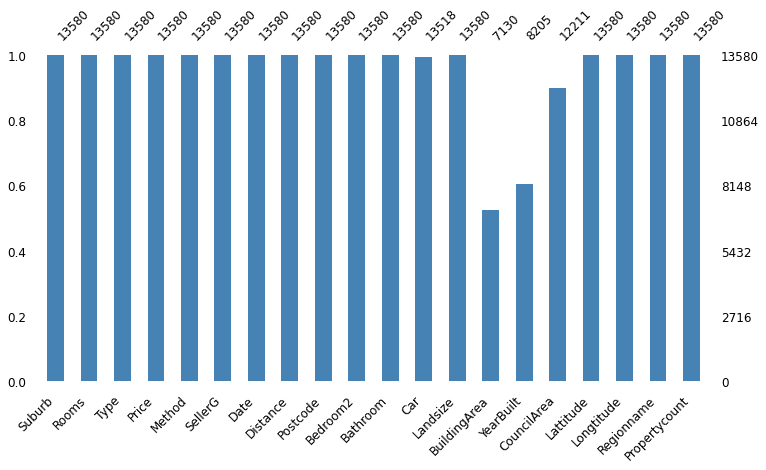

In [22]:
msno.bar(df, figsize=(12, 6), fontsize=12, color='steelblue');

In [23]:
df = df.drop(['BuildingArea', 'YearBuilt'], axis=1)

#### Eliminamos la variable `Bedroom2`

In [24]:
pd.crosstab(df.Bedroom2, df.Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bedroom2,,,,,,,,,
0.0,0,5,8,3,0,0,0,0,0
1.0,663,21,5,2,0,0,0,0,0
2.0,16,3539,162,19,1,0,0,0,0
3.0,2,74,5626,175,18,1,0,0,0
4.0,0,8,73,2473,42,4,0,1,0
5.0,0,1,5,15,531,2,2,0,0
6.0,0,0,0,0,2,59,0,2,0
7.0,0,0,0,0,1,1,8,0,0
8.0,0,0,0,0,1,0,0,4,0


In [25]:
df = df.drop(['Bedroom2'], axis=1)

#### Imputamos la variable `Bathroom`

In [26]:
pd.crosstab(df.Bathroom, df.Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bathroom,,,,,,,,,
0.0,1,19,11,3,0,0,0,0,0
1.0,674,3117,3250,452,17,2,0,0,0
2.0,6,504,2459,1720,260,20,3,2,0
3.0,0,8,153,469,244,35,5,2,1
4.0,0,0,5,41,47,9,2,2,0
5.0,0,0,1,2,25,0,0,0,0
6.0,0,0,2,0,2,1,0,0,0
7.0,0,0,0,0,1,0,0,1,0
8.0,0,0,0,1,0,0,0,1,0


In [27]:
df.loc[df.Bathroom == 0, 'Bathroom'] = 1

#### Imputamos la variable `Car`

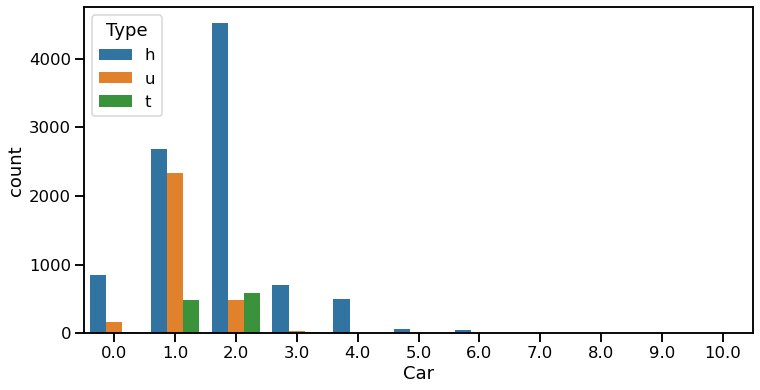

In [28]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='Car', hue='Type');

In [29]:
df.Car.fillna(value=0, inplace=True)

#### Agrupamos la variable `Regionname`

In [30]:
# Conteo de valores
df.Regionname.value_counts()\
  .reset_index()\
  .rename(columns={'index': 'Region',
                   'Regionname': 'Count'
                  }
         )

,Region,Count
0,Southern Metropolitan,4695
1,Northern Metropolitan,3890
2,Western Metropolitan,2948
3,Eastern Metropolitan,1471
4,South-Eastern Metropolitan,450
5,Eastern Victoria,53
6,Northern Victoria,41
7,Western Victoria,32


In [31]:
df.loc[df.Regionname == 'Eastern Victoria', 'Regionname'] = 'Victoria'
df.loc[df.Regionname == 'Northern Victoria', 'Regionname'] = 'Victoria'
df.loc[df.Regionname == 'Western Victoria', 'Regionname'] = 'Victoria'

In [32]:
# Conteo de valores
df.Regionname.value_counts()\
  .reset_index()\
  .rename(columns={'index': 'Region',
                   'Regionname': 'Count'
                  }
         )

,Region,Count
0,Southern Metropolitan,4695
1,Northern Metropolitan,3890
2,Western Metropolitan,2948
3,Eastern Metropolitan,1471
4,South-Eastern Metropolitan,450
5,Victoria,126


#### Agrupamos la variable `Date`

In [33]:
df.Date = pd.to_datetime(df.Date).dt.to_period('Q')

In [34]:
df.Date.value_counts()

2017Q3    2693
2017Q2    2521
2016Q3    2180
2016Q2    1838
2016Q4    1820
2017Q1    1521
2017Q4     509
2016Q1     498
Freq: Q-DEC, Name: Date, dtype: int64

In [35]:
# Copiamos nuestro dataset (para visualizarlo)
data = df[['Date', 'Price']].copy()

data.Date = pd.to_datetime(data.Date.dt.strftime('%YQ%q'))

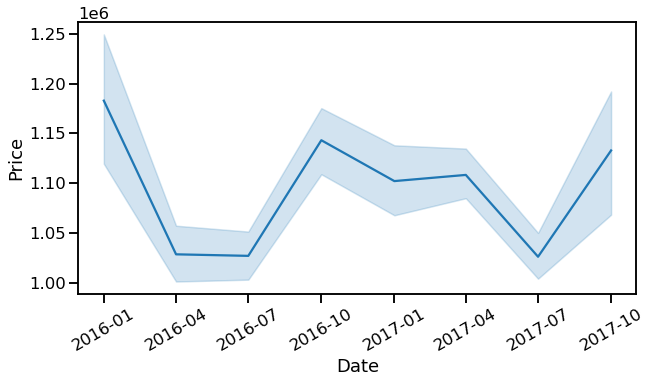

In [36]:
# Visualizamos la distribución
fig = plt.figure(figsize=(10, 5))

sns.lineplot(data=data, x='Date', y='Price')

plt.xticks(rotation=30);

Por cuestiones de almacenamiento, y para facilitar su posterior procesamiento, queremos guardar esta variable como un `string`.

In [37]:
df.Date.dtype

period[Q-DEC]

In [38]:
df.Date = df.Date.dt.strftime('%YQ%q')

df.Date.dtype

dtype('O')

#### Agrupamos la variable `SellerG`

In [39]:
df.SellerG.nunique()

268

In [40]:
# Conteo de valores
data = df.SellerG.value_counts()\
         .reset_index()\
         .rename(columns={'index': 'Seller',
                          'SellerG': 'Count'
                         }
                )

data

,Seller,Count
0,Nelson,1565
1,Jellis,1316
2,hockingstuart,1167
3,Barry,1011
4,Ray,701
...,...,...
263,Aquire,1
264,SN,1
265,Buxton/Find,1
266,Mindacom,1


In [41]:
lonely_seller = data[data.Count == 1].Seller

In [42]:
df.SellerG.replace(to_replace=lonely_seller.values, value='Others', inplace=True)

In [43]:
df.SellerG.nunique()

191

In [44]:
df[df.SellerG == 'Others'].head(3)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
55,Airport West,5,h,755000.0,PI,Others,2016Q2,13.5,3042.0,2.0,2.0,596.0,Moonee Valley,-37.7248,144.8699,Western Metropolitan,3464.0
512,Balwyn,3,h,2200000.0,S,Others,2016Q1,9.7,3103.0,3.0,2.0,651.0,Boroondara,-37.8085,145.0764,Southern Metropolitan,5682.0
622,Balwyn North,4,h,1800000.0,VB,Others,2016Q4,9.2,3104.0,2.0,4.0,587.0,Boroondara,-37.7841,145.0953,Southern Metropolitan,7809.0


### Ejercicio 1.3

El conjunto de datos de *AirBnB* dispone de **84** variables.

Para no extender el análisis demasiado, y que sea posible desarrollar la tarea definida en el tiempo que disponemos, nos limitaremos a estudiar las columnas `interesting_cols`.

In [45]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]

In [46]:
# Data Source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

airbnb_df.head(3)

/home/mgobbi289/miniconda3/envs/diplodatos-aycd/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


Al cargar el conjunto de datos, se produce un *warning* por la columna `zipcode`, que aparentemente tiene diferentes tipos.

#### Breve estudio del dataset

In [47]:
airbnb_df.shape

(22895, 13)

In [48]:
airbnb_df.columns

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

In [49]:
airbnb_df.describe()

,latitude,longitude,price,weekly_price,monthly_price
count,22895.000000,22895.000000,22895.000000,2524.000000,1891.000000
mean,-37.826827,145.008457,148.004368,906.976228,3234.346906
std,0.066747,0.127711,210.883253,821.223782,2808.092144
min,-38.224427,144.484326,0.000000,91.000000,400.000000
25%,-37.852665,144.957692,71.000000,450.000000,1700.000000
50%,-37.817855,144.978402,111.000000,750.000000,2800.000000
75%,-37.803176,145.013441,165.000000,1066.000000,3912.500000
max,-37.482595,145.839127,12624.000000,11536.000000,54258.000000


### Curación del conjunto de datos

In [50]:
# Copiamos nuestro dataset
bnb_df = airbnb_df.copy()

#### Limpiamos la variable `price`

In [51]:
# Métricas de la distribución de la variable price
print(f'Media: {bnb_df.price.mean()}')
print(f'Máximo: {bnb_df.price.max()}')
print(f'Mínimo: {bnb_df.price.min()}')

Media: 148.00436776588774
Máximo: 12624
Mínimo: 0


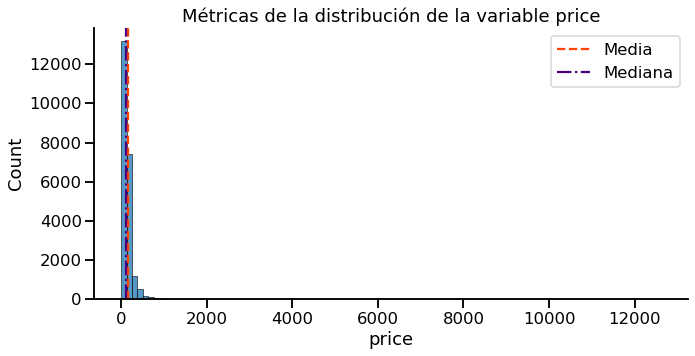

In [52]:
sns.displot(bnb_df.price, bins=100, aspect=2)

plt.title("Métricas de la distribución de la variable price")
plt.axvline(bnb_df.price.mean(), color='orangered', linestyle='--', label='Media')
plt.axvline(bnb_df.price.median(), color='indigo', linestyle='-.', label='Mediana')

plt.legend();

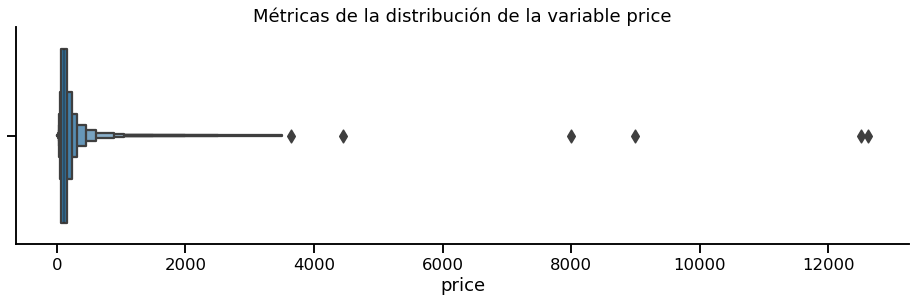

In [53]:
plt.figure(figsize=(16, 4))
plt.title("Métricas de la distribución de la variable price")

sns.boxenplot(x=bnb_df.price)
sns.despine()

**Respuesta**

En esta instancia, donde vamos a extender nuestro conjunto de datos con información externa, consideramos que sería prudente eliminar los valores *outliers* de la columna `price`.

In [54]:
# Eliminamos los outliers de ambos extremos de la distribución
bnb_df = clean_outliers(bnb_df, 'price')

In [55]:
# Métricas de la distribución de la variable price
print(f'Media: {bnb_df.price.mean()}')
print(f'Máximo: {bnb_df.price.max()}')
print(f'Mínimo: {bnb_df.price.min()}')

Media: 133.16784765279007
Máximo: 671
Mínimo: 0


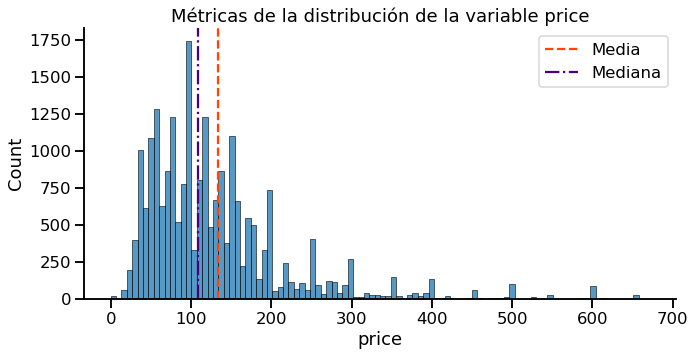

In [56]:
sns.displot(bnb_df.price, bins=100, aspect=2)

plt.title("Métricas de la distribución de la variable price")
plt.axvline(bnb_df.price.mean(), color='orangered', linestyle='--', label='Media')
plt.axvline(bnb_df.price.median(), color='indigo', linestyle='-.', label='Mediana')

plt.legend();

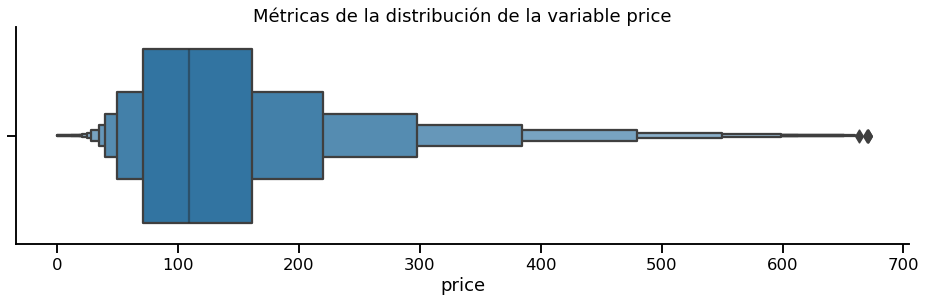

In [57]:
plt.figure(figsize=(16, 4))
plt.title("Métricas de la distribución de la variable price")

sns.boxenplot(x=bnb_df.price)
sns.despine()

#### Eliminamos las variables `weekly_price` y `monthly_price`

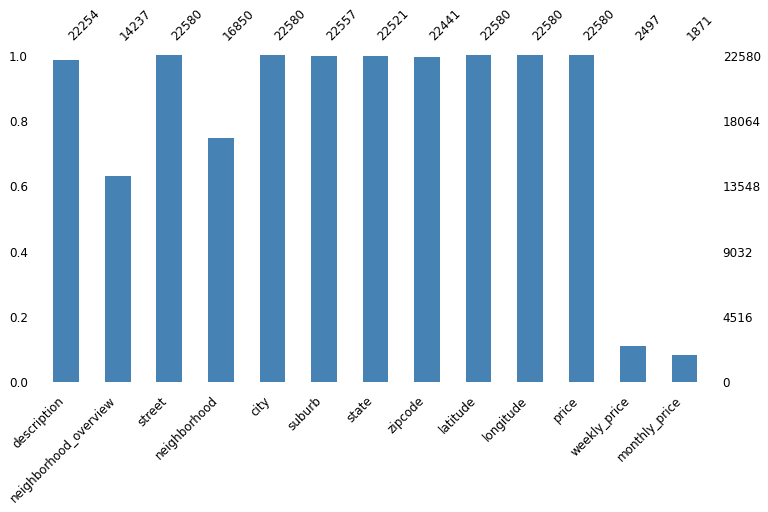

In [58]:
msno.bar(bnb_df, figsize=(12, 6), fontsize=12, color='steelblue');

In [59]:
bnb_df = bnb_df.drop(['weekly_price', 'monthly_price'], axis=1)

Las variables `weekly_price` y `monthly_price` son **numéricas**, y no aportan demasiada información ya que la mayoría de sus datos son *ruidosos* (aproximadamente, el 90%).
Por lo tanto, serán descartadas para continuar el análisis.

#### Eliminamos las variables `description` y `neighborhood_overview`

In [60]:
bnb_df.description.nunique()

21382

In [61]:
bnb_df.neighborhood_overview.nunique()

11890

In [62]:
bnb_df = bnb_df.drop(['description', 'neighborhood_overview'], axis=1)

Las variables `description` y `neighborhood_overview` son **categóricas**, y no aportan demasiada información ya que la mayoría de sus categorías son únicas (y tampoco estamos preparados para hacer **NLP** sobre las columnas).
Por lo tanto, serán descartadas para continuar el análisis.

#### Eliminamos las variables `street` y `state`

In [63]:
relevant_cols = ['street', 'suburb', 'state', 'city', 'neighborhood']

In [64]:
bnb_df[relevant_cols].sample(10, random_state=123)

,street,suburb,state,city,neighborhood
13102,"Melbourne, VIC, Australia",Melbourne,VIC,Melbourne,Central Business District
15440,"South Kingsville, VIC, Australia",South Kingsville,Victoria,Hobsons Bay,Spotswood/South Kingsville
14620,"Melbourne, VIC, Australia",Melbourne,VIC,Melbourne,Central Business District
14924,"Melbourne, VIC, Australia",Melbourne,VIC,Melbourne,Central Business District
8731,"Ringwood North, VIC, Australia",Ringwood North,VIC,Maroondah,NaN
15246,"Glen Waverley, VIC, Australia",Glen Waverley,VIC,Monash,NaN
21368,"Knoxfield, VIC, Australia",Knoxfield,VIC,Knox,NaN
8402,"Caulfield South, VIC, Australia",Caulfield South,VIC,Glen Eira,Caulfield
13314,"Cora Lynn, VIC, Australia",Cora Lynn,VIC,Cardinia,NaN
11374,"Melbourne, VIC, Australia",Melbourne,VIC,Melbourne,Central Business District


In [65]:
bnb_df.street.nunique()

632

In [66]:
bnb_df.state.nunique()

27

In [67]:
bnb_df.state.value_counts().reset_index().rename(columns={'index': 'state', 'state': 'count'})

,state,count
0,VIC,21569
1,Victoria,855
2,Vic,37
3,vic,10
4,Melbourne,6
5,Australia,6
6,victoria,5
7,VI,4
8,VIC 3008,4
9,维多利亚州,3


In [68]:
bnb_df = bnb_df.drop(['street', 'state'], axis=1)

Las variables `street` y `state` son **categóricas**, y no aportan demasiada información por diferentes motivos.

- La columna `street` es una composición de las columnas `suburb` y `state`, junto al nombre del país (en el conjunto de datos, siempre será *Australia*).

- La columna `state` comprende distintas maneras de nombrar al estado de **Victoria**, cuya capital es la ciudad de **Melbourne**.

Por lo tanto, serán descartadas para continuar el análisis.

#### Resumen de la Curación

De las **13** columnas...

- Se filtraron los *outliers* de **1**: `price`.
- Se eliminaron **6**: `weekly_price`, `monthly_price`, `description`, `neighborhood_overview`, `street`, `state`.
- Se aplicará la operación *merge* para agregar información de **7**: `price`, `zipcode`, `latitude`, `longitude`, `city`, `suburb`, `neighborhood`.

### Merge

El `zipcode` tiene tipos diferentes, que tendremos que estandarizar antes de continuar con la combinación de los datos.

In [69]:
bnb_df.zipcode = pd.to_numeric(bnb_df.zipcode, errors='coerce')

Antes de unir los conjuntos de datos, tenemos que asegurarnos que existen suficientes registros en común como para agregar información relevante.

In [70]:
intersection = numpy.intersect1d(
    bnb_df.zipcode.values,
    df.Postcode.values,
    assume_unique=False)

print("Airbnb unique zipcodes", len(bnb_df.zipcode.unique()))
print("Melbourne unique postcodes", len(df.Postcode.unique()))
print("Common codes", len(intersection))

Airbnb unique zipcodes 248
Melbourne unique postcodes 198
Common codes 191


In [71]:
pMelbourne = df.Postcode.isin(intersection).sum() / len(df)
pAirbnb = bnb_df.zipcode.isin(intersection).sum() / len(bnb_df)

print(f'Records in Melbourne df with corresponding code from Airbnb df: {pMelbourne}')
print(f'Records in Airbnb df with corresponding code from Melbourne df: {pAirbnb}')

Records in Melbourne df with corresponding code from Airbnb df: 0.9985272459499264
Records in Airbnb df with corresponding code from Melbourne df: 0.9305580159433127


Ya estamos en condiciones para aplicar el *merge*, solo resta agregar los datos que comparten `zipcode` en el conjunto de datos de **AirBnB**. 

In [72]:
relevant_cols = ['zipcode', 'price', 'latitude', 'longitude', 'city', 'suburb', 'neighborhood']

In [73]:
def agg_mode(series):
    """
    Cada entrada en el DS de AirBnB, tendrá algunas variables categóricas.
    Por cada agrupamiento de categorías, calcularemos su respectiva moda.
    """
    mode_df = series.mode()
    if mode_df.empty:
        # No hay valores, deberemos imputar más adelante.
        return numpy.nan
    # De manera arbitraria, tomamos solo una de las modas.
    return mode_df.head(1)

In [74]:
bnb_by_zipcode = bnb_df[relevant_cols].groupby('zipcode')\
    .agg(bnb_price_mean=('price', 'mean'),
         bnb_latitude_mean=('latitude', 'mean'),
         bnb_longitude_mean=('longitude', 'mean'),
         bnb_city_mode=('city', agg_mode),
         bnb_suburb_mode=('suburb', agg_mode),
         bnb_neighborhood_mode=('neighborhood', agg_mode))\
    .reset_index()

bnb_by_zipcode.head(5)

,zipcode,bnb_price_mean,bnb_latitude_mean,bnb_longitude_mean,bnb_city_mode,bnb_suburb_mode,bnb_neighborhood_mode
0,2010.0,40.000000,-37.884721,145.062267,Glen Eira,Malvern East,Carnegie
1,2134.0,50.000000,-37.799973,144.976898,Yarra,Burwood,Fitzroy
2,2582.0,104.000000,-37.629926,144.948196,Hume,Somerton VIC 3062,NaN
3,3000.0,141.788151,-37.813295,144.959560,Melbourne,Melbourne,Central Business District
4,3001.0,132.500000,-37.808598,144.956138,Melbourne,Melbourne,Carlton


In [75]:
merged_df = df.merge(bnb_by_zipcode, how='left', left_on='Postcode', right_on='zipcode')

merged_df.sample(5, random_state=123)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,Longtitude,Regionname,Propertycount,zipcode,bnb_price_mean,bnb_latitude_mean,bnb_longitude_mean,bnb_city_mode,bnb_suburb_mode,bnb_neighborhood_mode
5799,St Kilda,2,u,542500.0,PI,McGrath,2016Q4,6.1,3182.0,1.0,...,144.98730,Southern Metropolitan,13240.0,3182.0,135.842246,-37.863188,144.980379,Port Phillip,Saint Kilda,St Kilda
10596,Broadmeadows,3,h,386000.0,S,hockingstuart,2017Q3,14.0,3047.0,1.0,...,144.92281,Northern Metropolitan,4294.0,3047.0,63.857143,-37.687371,144.920237,Hume,Broadmeadows,NaN
7471,Ascot Vale,3,h,1230000.0,PI,Nelson,2017Q2,5.9,3032.0,1.0,...,144.90830,Western Metropolitan,6567.0,3032.0,101.959770,-37.779032,144.912828,Moonee Valley,Ascot Vale,Flemington
2308,Elwood,2,u,684000.0,SP,McGrath,2016Q4,7.7,3184.0,1.0,...,144.99100,Southern Metropolitan,8989.0,3184.0,128.981651,-37.880328,144.986104,Port Phillip,Elwood,Elwood
2602,Fitzroy North,3,h,1600000.0,S,Collins,2017Q1,3.5,3068.0,1.0,...,144.98920,Northern Metropolitan,6244.0,3068.0,123.817590,-37.786360,144.985513,Yarra,Fitzroy North,Fitzroy North


In [76]:
merged_df.shape

(13580, 24)

# Que falta para terminar...

3. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
    1. ~Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.~
    2. ~Utilizar la variable `zipcode` para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.~
    3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las *n* ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

**Observación**
Deberíamos sacar ideas del *notebook* opcional sobre combinación de coordenadas.

~Pueden leer otras columnas del conjunto de *AirBnB* además de las que están en `interesting_cols`, si les parecen relevantes.~

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna `CouncilArea` en base a la información presente en `Suburb`. Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora al conjunto de datos.

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de **AirBnB**.

In [77]:
# Copiamos nuestro dataset
full_df = merged_df.copy()

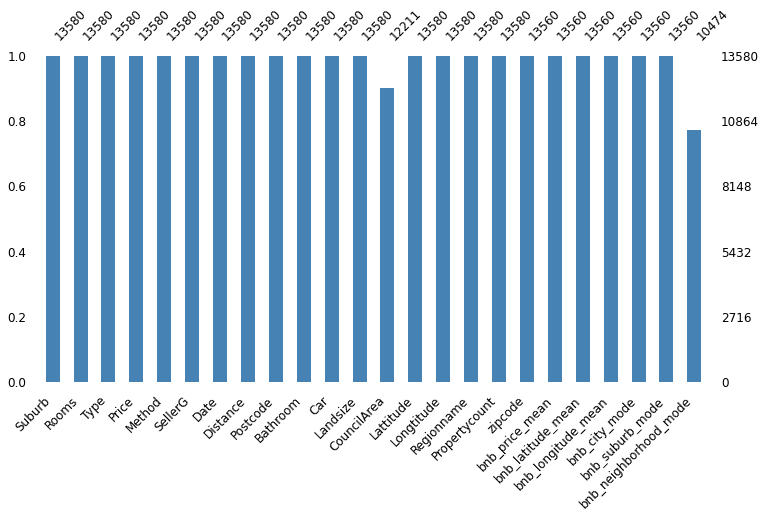

In [78]:
msno.bar(full_df, figsize=(12, 6), fontsize=12, color='steelblue');

Al aplicar la operación *merge*, había un total de **20** filas cuyo valor `Postcode` no coincidía con ninguno de los `zipcode` del conjunto de datos adicional.
Por lo tanto, luego de la operación, esas mismas filas poseen datos faltantes en las columnas agregadas.
Ya que es un subconjunto pequeño de valores, y para evitar tener que imputar **7** variables diferentes, vamos a descartar esas filas.

In [79]:
full_df = full_df.dropna(subset=['zipcode'])

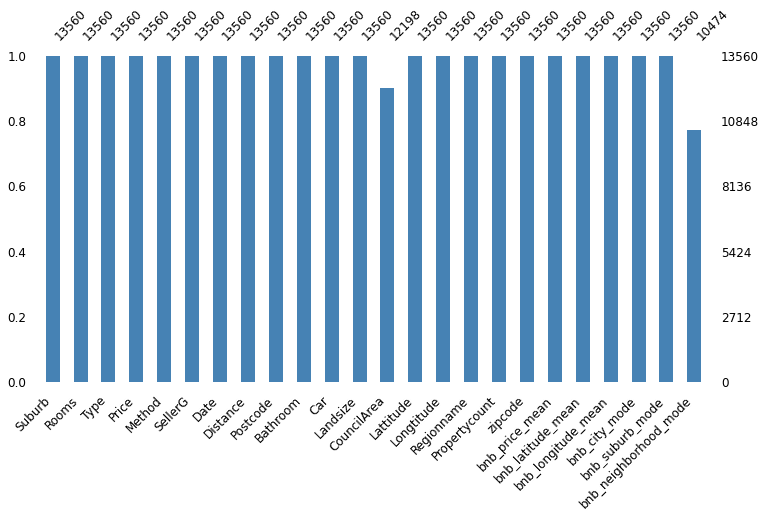

In [80]:
msno.bar(full_df, figsize=(12, 6), fontsize=12, color='steelblue');

In [81]:
relevant_cols = ['CouncilArea', 'Suburb']

In [82]:
full_df[relevant_cols].sample(5, random_state=54321)

,CouncilArea,Suburb
12550,NaN,Malvern
11958,Hume,Craigieburn
12259,NaN,Clifton Hill
7584,NaN,Brighton East
5791,Port Phillip,St Kilda


#### Imputación de `CouncilArea`

Se construirá un mapeo de `Suburb` a `CouncilArea` para la imputación.
Necesitamos que el mismo sea una función, para eso:
- Ignoramos las filas con `CouncilArea` faltante, ya que no aportan información.
- Descartamos los duplicados de `Suburb`, asumiendo que un suburbio pertenece a un único departamento.
- Definimos a la variable `Suburb` como el índice del mapeo, lo que permite su aplicación.

In [83]:
# Vamos a construir un mapeo Suburb ---> CouncilArea

# 1° Tiramos las filas con valor CouncilArea faltante
map_df = full_df[relevant_cols].dropna()

# 2° Tiramos los duplicados y definimos el índice
map_df = map_df.drop_duplicates(subset='Suburb', keep='first').set_index('Suburb')

map_df

,CouncilArea
Suburb,
Abbotsford,Yarra
Airport West,Moonee Valley
Albert Park,Port Phillip
Alphington,Darebin
Altona,Hobsons Bay
...,...
Springvale South,Greater Dandenong
Yarra Glen,Yarra Ranges
Brookfield,Melton


In [84]:
# 3° Definimos el mapeo Suburb ---> CouncilArea
map_df = full_df.Suburb.map(map_df.CouncilArea)

# Aplicamos el mapeo a nuestro DF
full_df.CouncilArea = full_df.CouncilArea.fillna(map_df)

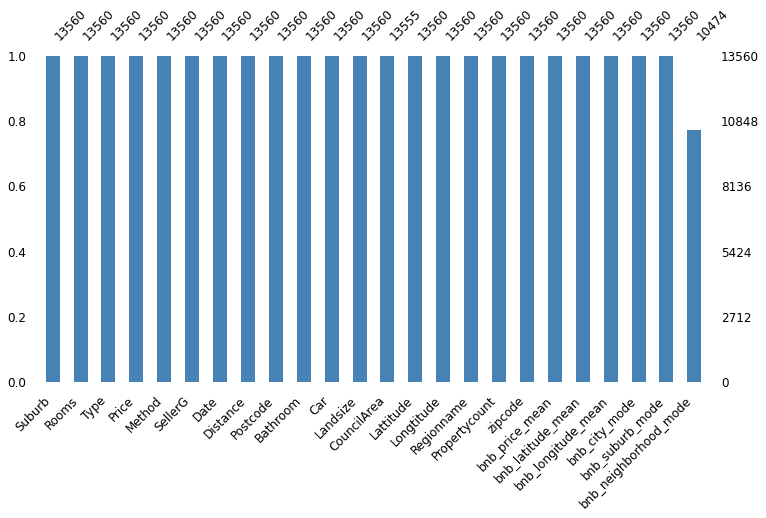

In [85]:
msno.bar(full_df, figsize=(12, 6), fontsize=12, color='steelblue');

In [86]:
full_df[relevant_cols].sample(5, random_state=54321)

,CouncilArea,Suburb
12550,Stonnington,Malvern
11958,Hume,Craigieburn
12259,Yarra,Clifton Hill
7584,Bayside,Brighton East
5791,Port Phillip,St Kilda


In [87]:
relevant_cols = ['CouncilArea', 'Suburb', 'bnb_city_mode', 'bnb_suburb_mode', 'bnb_neighborhood_mode']

In [88]:
full_df[relevant_cols][full_df.CouncilArea.isna()]

,CouncilArea,Suburb,bnb_city_mode,bnb_suburb_mode,bnb_neighborhood_mode
12251,NaN,Burnside,Melton,Caroline Springs,NaN
12438,NaN,Attwood,Hume,Westmeadows,NaN
13264,NaN,Plumpton,Melton,Plumpton,NaN
13381,NaN,Burnside,Melton,Caroline Springs,NaN
13494,NaN,Monbulk,Yarra Ranges,Monbulk,NaN


Para los valores restantes, nos limitaremos a imputar por la **moda**.
Probablemente no sea la forma más inteligente de completar la información faltante en nuestro conjunto de datos, ya que le introduce un *sesgo* de manera innecesaria, pero al no tener conocimiento de dominio consideramos que es la solución más práctica.

In [89]:
# Imputamos los valores restantes con el valor más frecuente
from sklearn.impute import SimpleImputer

most_frequent_imputer = SimpleImputer(strategy='most_frequent')

relevant_cols = ['CouncilArea', 'bnb_neighborhood_mode']

full_df[relevant_cols] = most_frequent_imputer.fit_transform(full_df[relevant_cols])

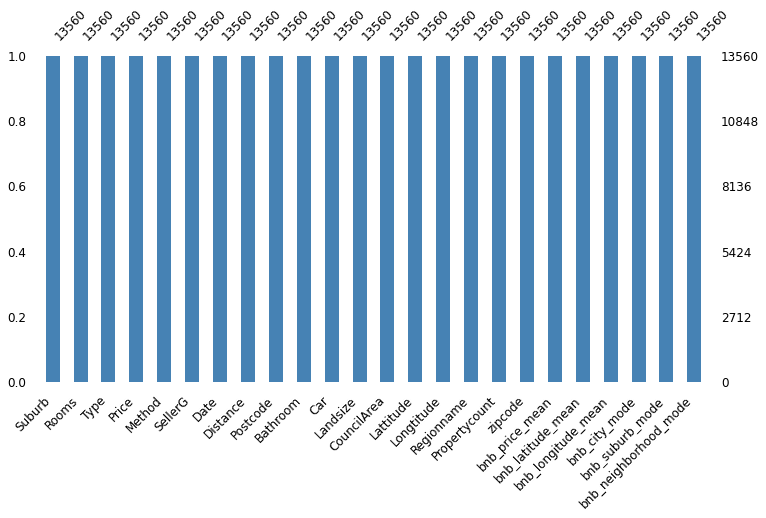

In [90]:
msno.bar(full_df, figsize=(12, 6), fontsize=12, color='steelblue');

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [91]:
full_df.to_csv('DataSet/dataset.csv', index=False)